In [1]:
import pandas as pd
import numpy as np
import string
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import sys
import dateutil.parser
import isodate
import scipy.stats as stats
import datetime
from matplotlib.gridspec import GridSpec
sys.path.append('../src')
from analysis import *


## Channel Data

In [2]:
df_channels = pd.read_csv('../data/channel_data.csv')

In [3]:
df_channels[['channelTitle','videoCount']].sort_values('videoCount', ascending=False)

,channelTitle,videoCount
1,Global Mountain Bike Network,1761
3,Pinkbike,658
0,Sam Pilgrim,619
20,Clint Gibbs,601
9,BKXC,545
6,Seth's Bike Hacks,346
14,GMBN Tech,340
21,KevCentral,323
11,The Singletrack Sampler,282
16,Fabio Wibmer,243


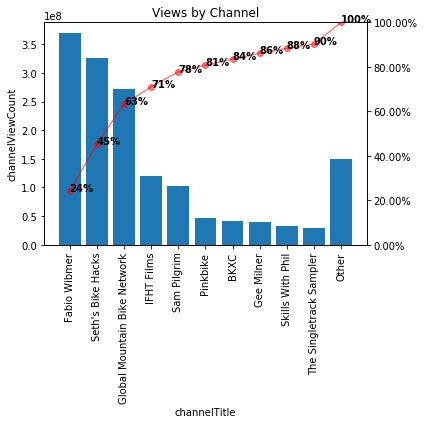

In [4]:
pareto_plot(df_channels, x='channelTitle', y='channelViewCount', title='Views by Channel', show_pct_y=True, pct_format='{0:.0%}')

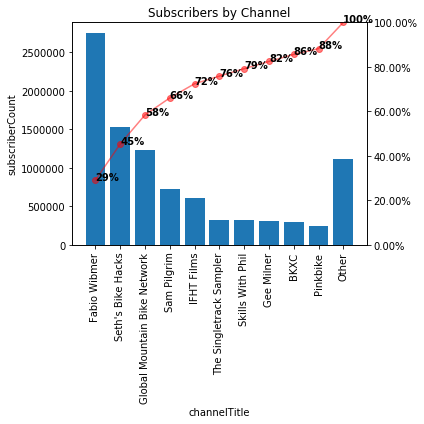

In [5]:
pareto_plot(df_channels, x='channelTitle', y='subscriberCount', title='Subscribers by Channel', show_pct_y=True, pct_format='{0:.0%}')

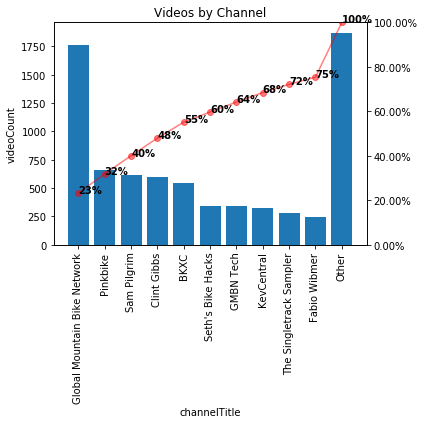

In [6]:
pareto_plot(df_channels, x='channelTitle', y='videoCount', title='Videos by Channel', show_pct_y=True, pct_format='{0:.0%}')

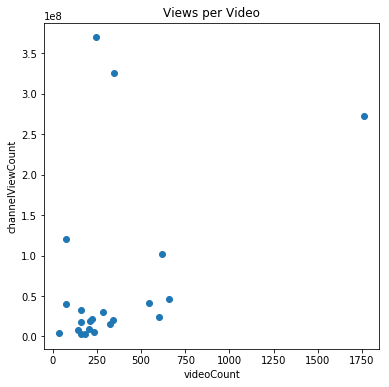

In [7]:
plot_relationships(df_channels, 'videoCount', 'channelViewCount','Views per Video')

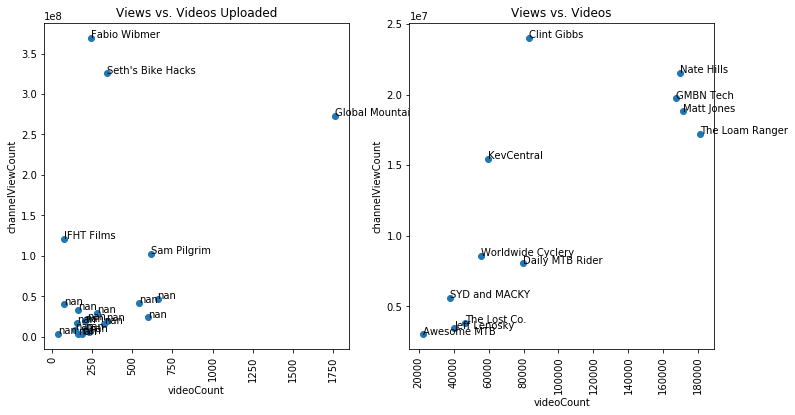

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].plot(df_channels.videoCount, df_channels.channelViewCount, 'o')
ax[0].set_title('Views vs. Videos Uploaded')
ax[0].set_xlabel('videoCount')
ax[0].set_ylabel('channelViewCount')
ax[0].tick_params(axis = 'x', rotation = 90)

label_points(df_channels.videoCount,
             df_channels.channelViewCount,
             df_channels.highViews,
             ax[0])


ax[1].plot(df_channels[df_channels.subscriberCount < 200000].subscriberCount,
        df_channels[df_channels.subscriberCount < 200000].channelViewCount, 'o')
ax[1].set_title('Views vs. Videos')
ax[1].set_xlabel('videoCount')
ax[1].set_ylabel('channelViewCount')
ax[1].tick_params(axis = 'x', rotation = 90)

label_points(df_channels[df_channels.subscriberCount < 200000].subscriberCount,
             df_channels[df_channels.subscriberCount < 200000].channelViewCount,
             df_channels[df_channels.subscriberCount < 200000].channelTitle,
             ax[1])

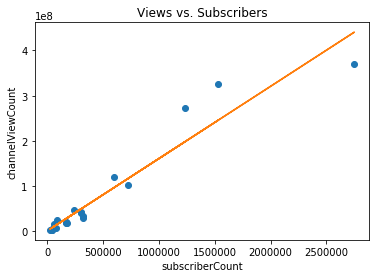

In [9]:
plot_with_line_of_fit(df_channels,'subscriberCount','channelViewCount',title = 'Views vs. Subscribers')

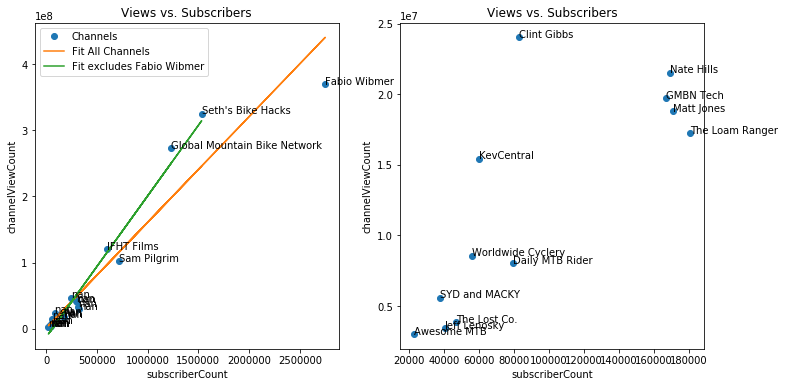

In [10]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].plot(df_channels.subscriberCount, df_channels.channelViewCount, 'o')
ax[0].set_title('Views vs. Subscribers')
ax[0].set_xlabel('subscriberCount')
ax[0].set_ylabel('channelViewCount')

label_points(df_channels.subscriberCount,
             df_channels.channelViewCount,
             df_channels.highViews,
             ax=ax[0])

ax[0].plot(df_channels.subscriberCount, 
        line_of_fit(df_channels,'subscriberCount','channelViewCount'));

ax[0].plot(df_channels.loc[df_channels['channelTitle']!= 'Fabio Wibmer'].subscriberCount,
        line_of_fit(df_channels.loc[df_channels['channelTitle'] != 'Fabio Wibmer'],
                      'subscriberCount',
                      'channelViewCount'))

ax[0].legend(('Channels', 'Fit All Channels', 'Fit excludes Fabio Wibmer'))



ax[1].plot(df_channels[df_channels.subscriberCount < 200000].subscriberCount,
        df_channels[df_channels.subscriberCount < 200000].channelViewCount, 'o')
ax[1].set_title('Views vs. Subscribers')
ax[1].set_xlabel('subscriberCount')
ax[1].set_ylabel('channelViewCount')

label_points(df_channels[df_channels.subscriberCount < 200000].subscriberCount,
             df_channels[df_channels.subscriberCount < 200000].channelViewCount,
             df_channels[df_channels.subscriberCount < 200000].channelTitle,
             ax=ax[1])


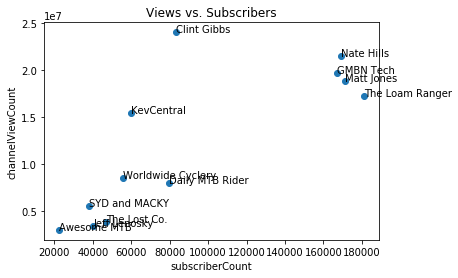

In [11]:
fig, ax = plt.subplots(figsize = (6,4))

ax.plot(df_channels[df_channels.subscriberCount < 200000].subscriberCount,
        df_channels[df_channels.subscriberCount < 200000].channelViewCount, 'o')
ax.set_title('Views vs. Subscribers')
ax.set_xlabel('subscriberCount')
ax.set_ylabel('channelViewCount')

label_points(df_channels[df_channels.subscriberCount < 200000].subscriberCount,
             df_channels[df_channels.subscriberCount < 200000].channelViewCount,
             df_channels[df_channels.subscriberCount < 200000].channelTitle,
             ax)


## Video Data

In [12]:
video_deets_df = pd.read_csv('../data/video_deets_df.csv')

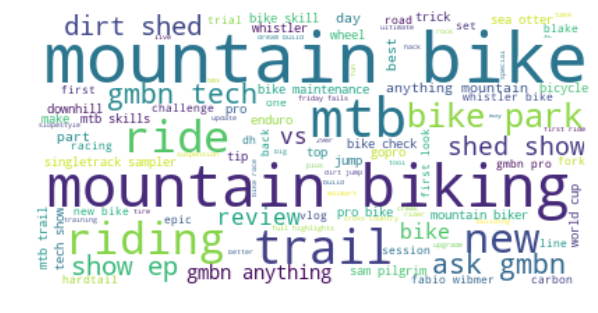

In [13]:
make_wordcloud(video_deets_df,'videoTitle')

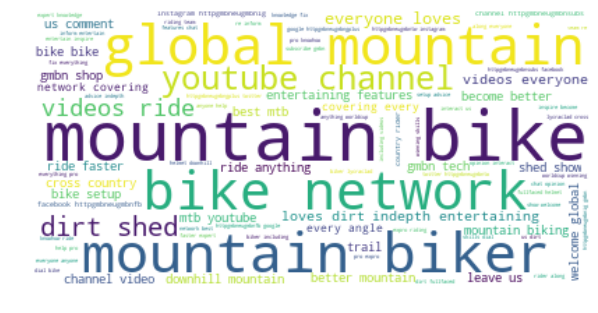

In [14]:
make_wordcloud(video_deets_df,'videoDescription')

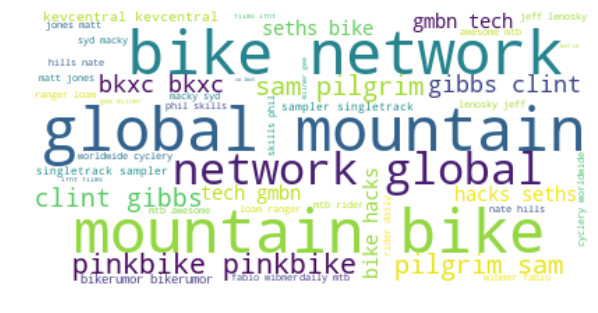

In [15]:
make_wordcloud(video_deets_df,'channelTitle')

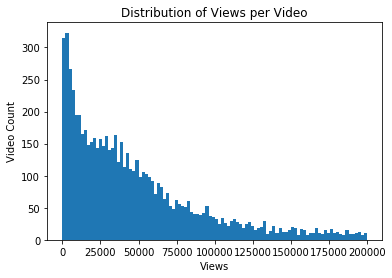

In [16]:
plt.hist(video_deets_df.viewCount, bins = 100, range=(0, 200000))
plt.xlabel('Views')
plt.ylabel('Video Count')
plt.title('Distribution of Views per Video')
plt.show();

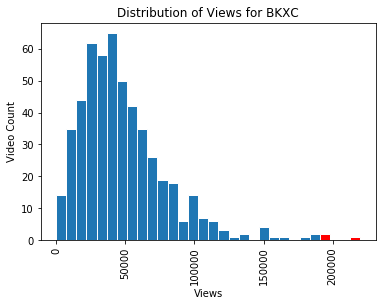

In [17]:
channel_hist('BKXC',220000,95)

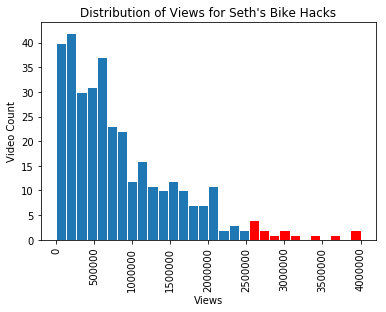

In [18]:
channel_hist('Seth\'s Bike Hacks',4000000,95)

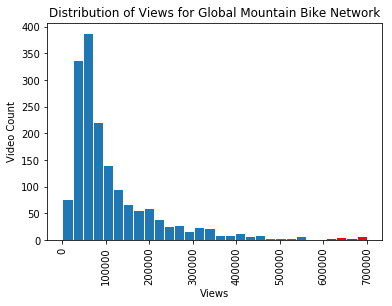

In [19]:
channel_hist('Global Mountain Bike Network',700000,95)

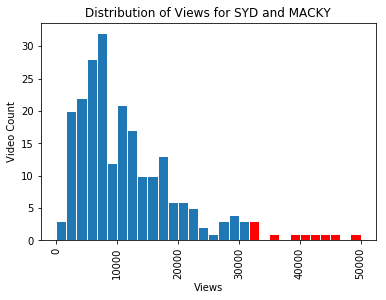

In [20]:
channel_hist('SYD and MACKY',50000,95)

In [21]:
top_videos_per_channel('BKXC',.95).head(3)

,Unnamed: 0,Unnamed: 0.1,videoID,channelId,categoryId,channelTitle,videoTitle,videoDescription,publishedAt,commentCount,...,definition,duration,licensedContent,projection,liveBroadcastContent,durationSeconds,wordsInVideoTitle,wordsInVideoDescription,daysSinceVideoReleased,liveVideo
4252,4254,4254,w2sMFZIB6zA,UC3DFdy_qc-cqgKCyQTHLGzA,17,BKXC,"""That hip jump was sketchy"" | Redemption 17 | ...","After a day of projects Alexander, Seth and I ...",2017-06-05 10:30:00+00:00,3178,...,hd,PT18M21S,False,rectangular,True,1101.0,11,111,829,1
4074,4076,4076,sAOhdtTVteo,UC3DFdy_qc-cqgKCyQTHLGzA,17,BKXC,The butt-puckering boardwalks of Ft. Bill | Mo...,Day two of the UK trip brought us to Ft. Willi...,2018-06-04 15:00:08+00:00,1469,...,hd,PT23M17S,True,rectangular,True,1397.0,14,200,465,1
4064,4066,4066,a7ljpOGF-O0,UC3DFdy_qc-cqgKCyQTHLGzA,17,BKXC,What are we getting into? | Mountain Biking Sn...,You guys have been telling me to go ride Snowd...,2018-06-20 15:00:03+00:00,1302,...,hd,PT25M29S,True,rectangular,True,1529.0,9,145,449,1


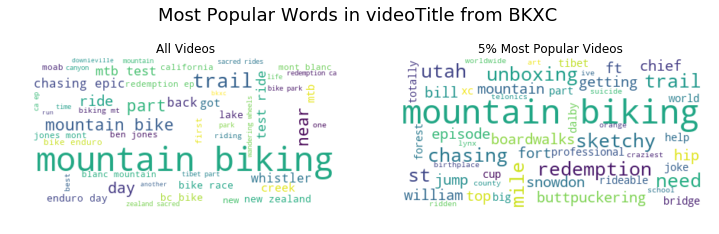

In [22]:
wordcloud_all_vs_top_words_per_channel(video_deets_df, 'BKXC', 'videoTitle', .95)

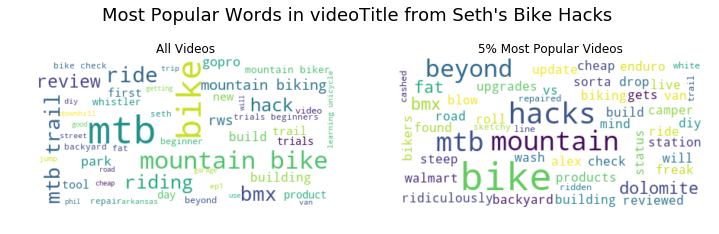

In [23]:
wordcloud_all_vs_top_words_per_channel(video_deets_df, 'Seth\'s Bike Hacks', 'videoTitle', .95)

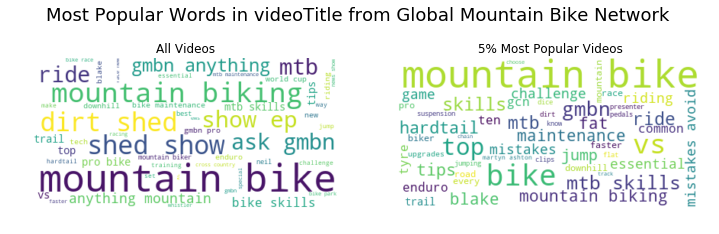

In [24]:
wordcloud_all_vs_top_words_per_channel(video_deets_df, 'Global Mountain Bike Network', 'videoTitle', .95)

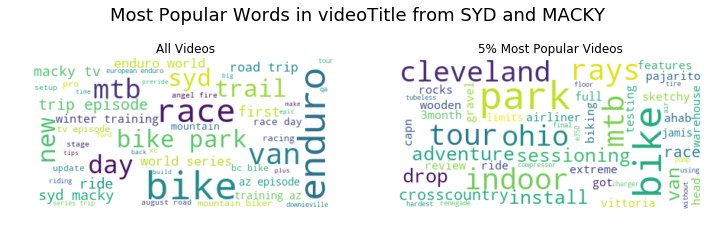

In [25]:
wordcloud_all_vs_top_words_per_channel(video_deets_df, 'SYD and MACKY', 'videoTitle', .95)

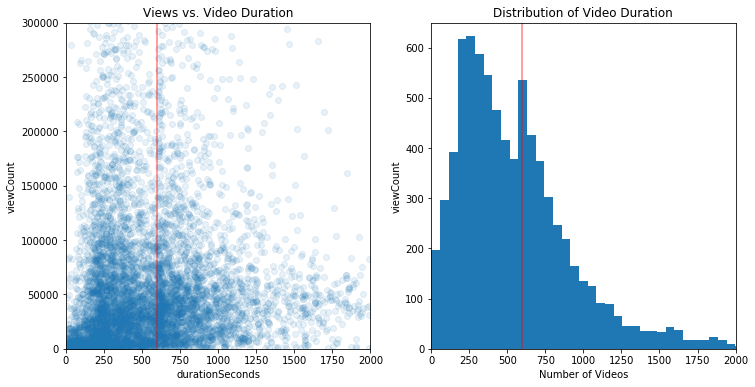

In [26]:
df = video_deets_df
x = 'durationSeconds'
y = 'viewCount'

xlabel = x
ylabel = y
dfplot = df[[x,y]]

x = dfplot[x].values
y = dfplot[y].values

fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(x, y, 'o', alpha = .1)
ax[0].set_xlabel(xlabel)
ax[0].set_ylabel(ylabel)
ax[0].set_title('Views vs. Video Duration')
ax[0].set_xlim([0,2000])
ax[0].set_ylim([0,300000])
ax[0].axvline(x = 600, color = 'r', alpha = .5)

ax[1].hist(x, bins = 500)
ax[1].set_ylabel(ylabel)
ax[1].set_xlabel('Number of Videos')
ax[1].set_title('Distribution of Video Duration')
ax[1].set_xlim([0,2000])
ax[1].set_ylim([0,650])
ax[1].axvline(x = 600, color = 'r', alpha = .5);

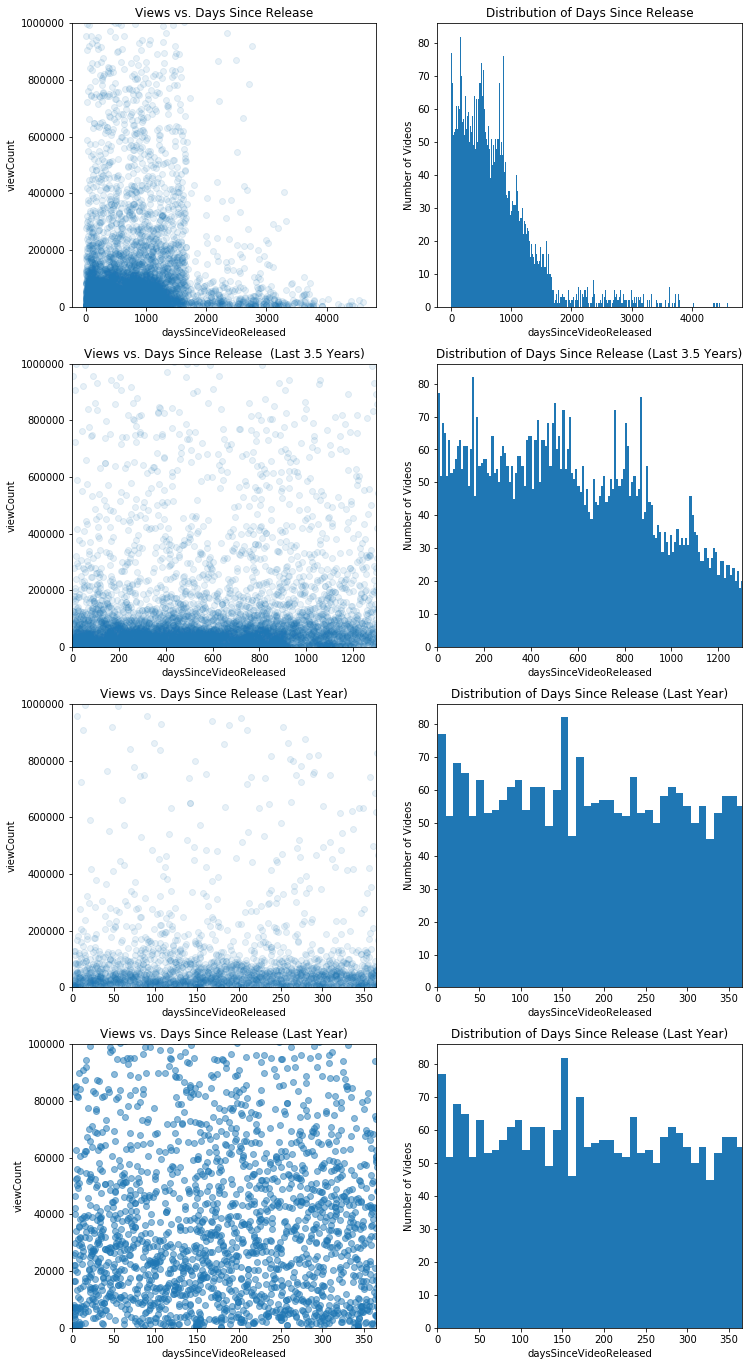

In [27]:
df = video_deets_df
x = 'daysSinceVideoReleased'
y = 'viewCount'

xlabel = x
ylabel = y

dfplot = df[[x,y]]

x = dfplot[x].values
y = dfplot[y].values

fig, ax = plt.subplots(4,2,figsize=(12,24))

ax[0,0].plot(x, y, 'o', alpha = .1)
ax[0,0].set_xlabel(xlabel)
ax[0,0].set_ylabel(ylabel)
ax[0,0].set_title('Views vs. Days Since Release')
ax[0,0].set_xlim(None)
ax[0,0].set_ylim([0,1000000])

ax[0,1].hist(x, bins = 500)
ax[0,1].set_xlabel(xlabel)
ax[0,1].set_ylabel('Number of Videos')
ax[0,1].set_title('Distribution of Days Since Release')

ax[1,0].plot(x, y, 'o', alpha = .1)
ax[1,0].set_xlabel(xlabel)
ax[1,0].set_ylabel(ylabel)
ax[1,0].set_title('Views vs. Days Since Release  (Last 3.5 Years)')
ax[1,0].set_xlim([0,1300])
ax[1,0].set_ylim([0,1000000])

ax[1,1].hist(x, bins = 500)
ax[1,1].set_xlabel(xlabel)
ax[1,1].set_xlim([0,1300])
ax[1,1].set_ylabel('Number of Videos')
ax[1,1].set_title('Distribution of Days Since Release (Last 3.5 Years)')

ax[2,0].plot(x, y, 'o', alpha = .1)
ax[2,0].set_xlabel(xlabel)
ax[2,0].set_ylabel(ylabel)
ax[2,0].set_title('Views vs. Days Since Release (Last Year)')
ax[2,0].set_xlim([0,365])
ax[2,0].set_ylim([0,1000000])

ax[2,1].hist(x, bins = 500)
ax[2,1].set_xlabel(xlabel)
ax[2,1].set_xlim([0,365])
ax[2,1].set_ylabel('Number of Videos')
ax[2,1].set_title('Distribution of Days Since Release (Last Year)')

ax[3,0].plot(x, y, 'o', alpha = .5)
ax[3,0].set_xlabel(xlabel)
ax[3,0].set_ylabel(ylabel)
ax[3,0].set_title('Views vs. Days Since Release (Last Year)')
ax[3,0].set_xlim([0,365])
ax[3,0].set_ylim([0,100000])

ax[3,1].hist(x, bins = 500)
ax[3,1].set_xlabel(xlabel)
ax[3,1].set_xlim([0,365])
ax[3,1].set_ylabel('Number of Videos')
ax[3,1].set_title('Distribution of Days Since Release (Last Year)');